In [ ]:
from datetime import datetime
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
dataset = pd.read_csv('Dataset/AAPL.csv', index_col=0)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-14,26.927500,26.952499,26.020000,26.427500,24.825821,204702000
2016-11-15,26.642500,26.920000,26.540001,26.777500,25.154610,129058000
2016-11-16,26.674999,27.557501,26.650000,27.497499,25.830971,235362000
2016-11-17,27.452499,27.587500,27.207500,27.487499,25.821573,110528000
2016-11-18,27.430000,27.635000,27.415001,27.514999,25.847408,113715600


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 2016-11-14 to 2020-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,55.022847,55.634645,54.439440,55.068780,53.661965,1.279139e+08
std,22.808228,23.199504,22.329356,22.778370,23.265842,5.914382e+07
min,26.642500,26.920000,26.020000,26.427500,24.825821,2.880380e+07
25%,39.973123,40.278123,39.636251,39.968751,38.069605,8.788140e+07
50%,47.244999,47.631248,46.872500,47.197500,45.769047,1.118354e+08
75%,61.968749,63.971249,61.203751,62.090624,61.046269,1.499102e+08
max,137.589996,137.979996,130.529999,134.179993,133.948898,4.479400e+08


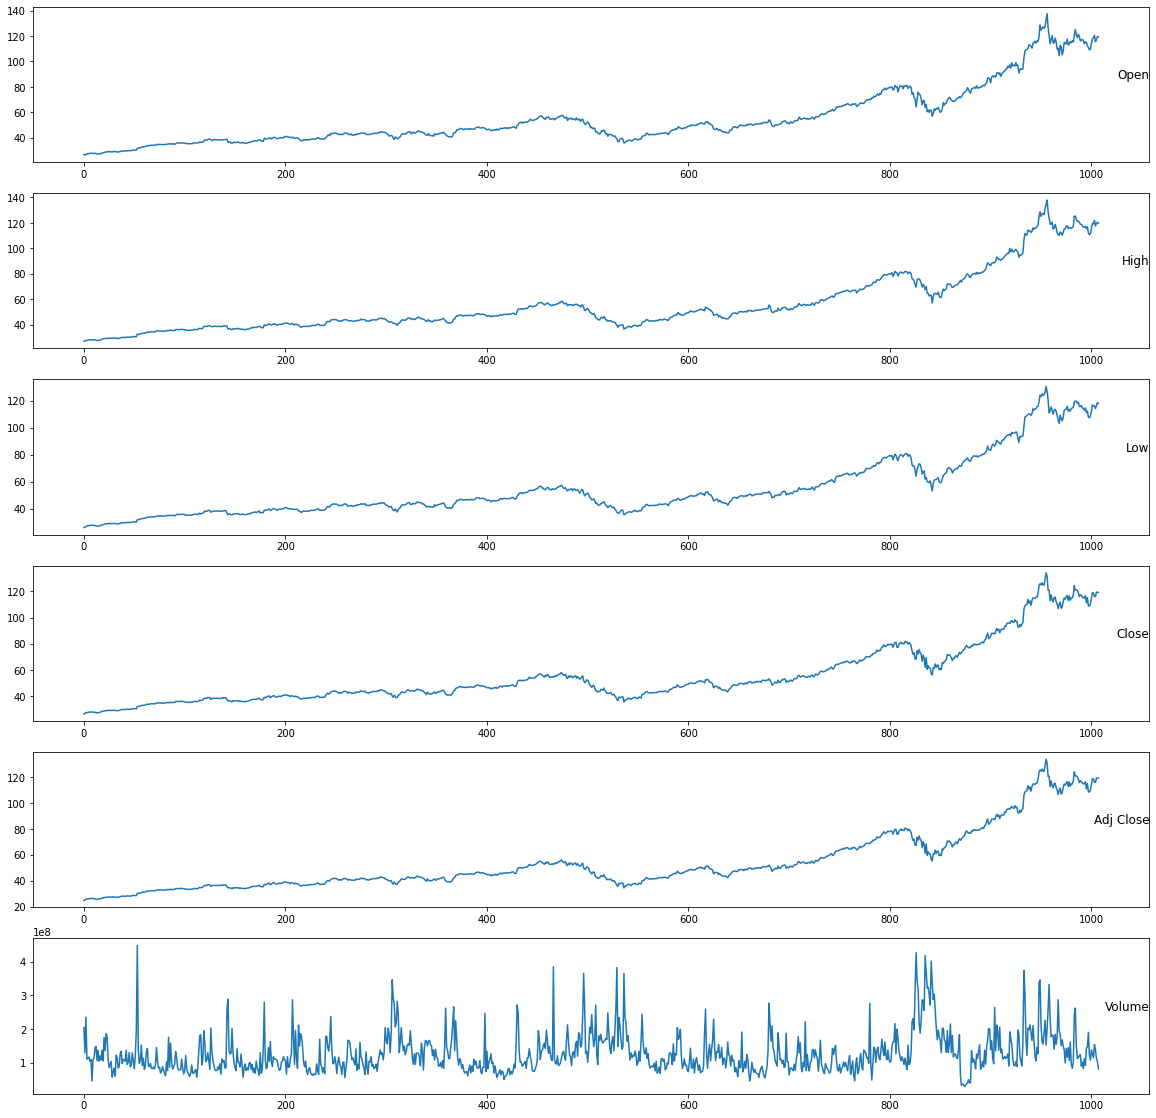

In [ ]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure(figsize=(20,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))        
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True) # kết quả sau khi drop gán luôn vào agg
    return agg

In [ ]:
#pre-processing data
# # load dataset
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(values)
scaled = scaler.transform(values)
print('Frame as Series:')
print(scaled[:5])
# frame as supervised learning
reframed = series_to_supervised(scaled,1 ,1)
print('Frame as supervised learning: ')
print(reframed.head())
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print('Frame will use: ')
print(reframed.head())

Frame as Series:
[[2.5687814e-03 2.9262900e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.1966838e-01]
 [0.0000000e+00 0.0000000e+00 4.9756020e-03 3.2481849e-03 3.0130148e-03
  2.3919241e-01]
 [2.9292703e-04 5.7401359e-03 6.0281307e-03 9.9301785e-03 9.2111528e-03
  4.9281877e-01]
 [7.3007494e-03 6.0102493e-03 1.1362538e-02 9.8373443e-03 9.1250390e-03
  1.9498245e-01]
 [7.0979595e-03 6.4379573e-03 1.3347998e-02 1.0092571e-02 9.3617886e-03
  2.0258759e-01]]
Frame as supervised learning: 
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.002569   0.000293   0.000000   0.000000   0.000000   0.419668  0.000000   
2   0.000000   0.000000   0.004976   0.003248   0.003013   0.239192  0.000293   
3   0.000293   0.005740   0.006028   0.009930   0.009211   0.492819  0.007301   
4   0.007301   0.006010   0.011363   0.009837   0.009125   0.194982  0.007098   
5   0.007098   0.006438   0.013348   0.010093   0.009362   0.202588  0.007999   

    var2(t)   var3(

In [ ]:
# Train-test split
# split into train and test sets
values = reframed.values
n_train_hours = int(len(dataset) * 0.8)
train = values[:n_train_hours, :]
# còn lại thì là test
test = values[n_train_hours:, :]
# split into input and outputs (các cột đầu, cột cuối)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print('Before reshape: ')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('After reshape: ')
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Before reshape: 
(806, 6) (806,) (201, 6) (201,)
After reshape: 
(806, 1, 6) (806,) (201, 1, 6) (201,)


In [ ]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
# design network
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y,
                    epochs=50,
                    batch_size=72,
                    validation_data=(test_X, test_y),
                    verbose=2
                   )

Epoch 1/50
12/12 - 3s - loss: 0.1700 - val_loss: 0.5215 - 3s/epoch - 223ms/step
Epoch 2/50
12/12 - 0s - loss: 0.1092 - val_loss: 0.3893 - 66ms/epoch - 5ms/step
Epoch 3/50
12/12 - 0s - loss: 0.0585 - val_loss: 0.2589 - 64ms/epoch - 5ms/step
Epoch 4/50
12/12 - 0s - loss: 0.0429 - val_loss: 0.1844 - 61ms/epoch - 5ms/step
Epoch 5/50
12/12 - 0s - loss: 0.0402 - val_loss: 0.1719 - 60ms/epoch - 5ms/step
Epoch 6/50
12/12 - 0s - loss: 0.0339 - val_loss: 0.1631 - 67ms/epoch - 6ms/step
Epoch 7/50
12/12 - 0s - loss: 0.0288 - val_loss: 0.1149 - 65ms/epoch - 5ms/step
Epoch 8/50
12/12 - 0s - loss: 0.0225 - val_loss: 0.0595 - 63ms/epoch - 5ms/step
Epoch 9/50
12/12 - 0s - loss: 0.0158 - val_loss: 0.0187 - 63ms/epoch - 5ms/step
Epoch 10/50
12/12 - 0s - loss: 0.0093 - val_loss: 0.0391 - 62ms/epoch - 5ms/step
Epoch 11/50
12/12 - 0s - loss: 0.0066 - val_loss: 0.0660 - 63ms/epoch - 5ms/step
Epoch 12/50
12/12 - 0s - loss: 0.0058 - val_loss: 0.0689 - 64ms/epoch - 5ms/step
Epoch 13/50
12/12 - 0s - loss: 0.0052

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4992      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


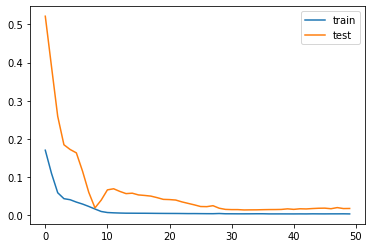

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
test_X.shape

(201, 1, 6)

In [ ]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(806, 1, 6) (806,) (201, 1, 6) (201,)


In [ ]:
def invert_scaling(y, X, s):
    # invert scaling for forecast
    inv_y = np.concatenate((y, X[:, 1:]), axis=1)
    print(s, "shape:", inv_y.shape)
    inv_y = scaler.inverse_transform(inv_y)
    print(s, inv_y.shape)
    # trả lại hình dạng ban đầu
    inv_y = inv_y[:,0]
    return inv_y

In [ ]:
# make a prediction
yhat = model.predict(test_X)
print('Test_X_shape:', test_X.shape)
test_X_now = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print('Test_X_now,shape: ', test_X_now.shape)

# # invert scaling for forecast
inv_yhat = invert_scaling(yhat, test_X_now, 'inv_yhat')

# invert scaling for actual
test_y = test_y.reshape((len(test_y),1))
inv_y = invert_scaling(test_y, test_X_now, 'inv_y')

7/7 [==============================] - 1s 2ms/step
Test_X_shape: (201, 1, 6)
Test_X_now,shape:  (201, 6)
inv_yhat shape: (201, 6)
inv_yhat (201, 6)
inv_y shape: (201, 6)
inv_y (201, 6)


In [ ]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)

Test RMSE: 2.646
Test MAE: 1.909


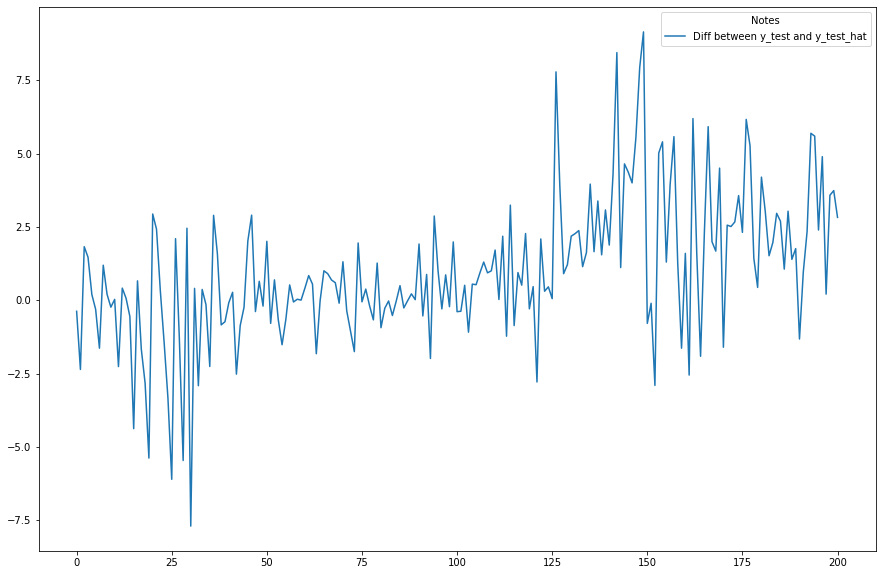

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(inv_y - inv_yhat, label='Diff between y_test and y_test_hat')
plt.legend(title="Notes")
plt.show()

In [ ]:
# make a prediction of y
y_train_hat = model.predict(train_X)
train_X_now = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# invert scaling for forecast
inv_y_train_hat = invert_scaling(y_train_hat, train_X_now, "inv_y_train_hat")

26/26 [==============================] - 0s 2ms/step
inv_y_train_hat shape: (806, 6)
inv_y_train_hat (806, 6)


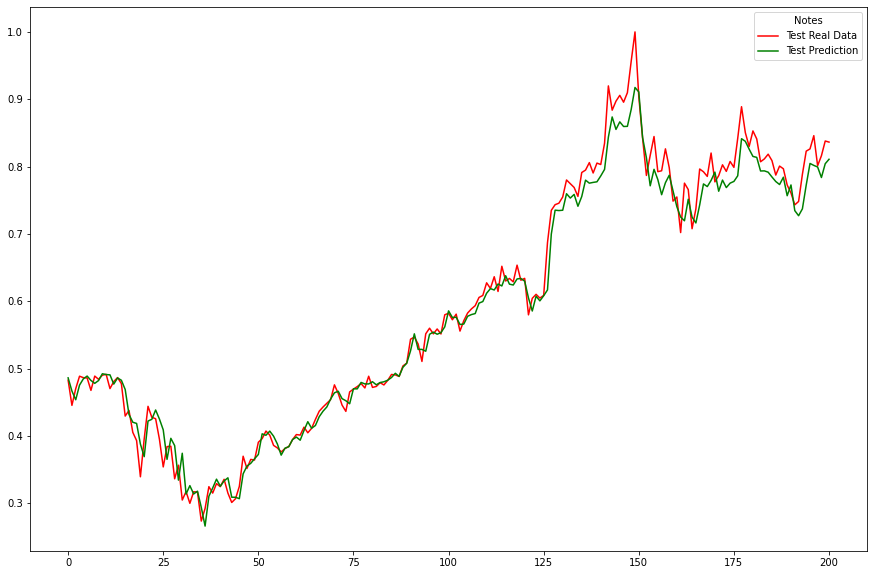

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(test_y, label='Test Real Data', color='red')
plt.plot(yhat, label='Test Prediction', color='green')
plt.legend(title="Notes")
plt.show()

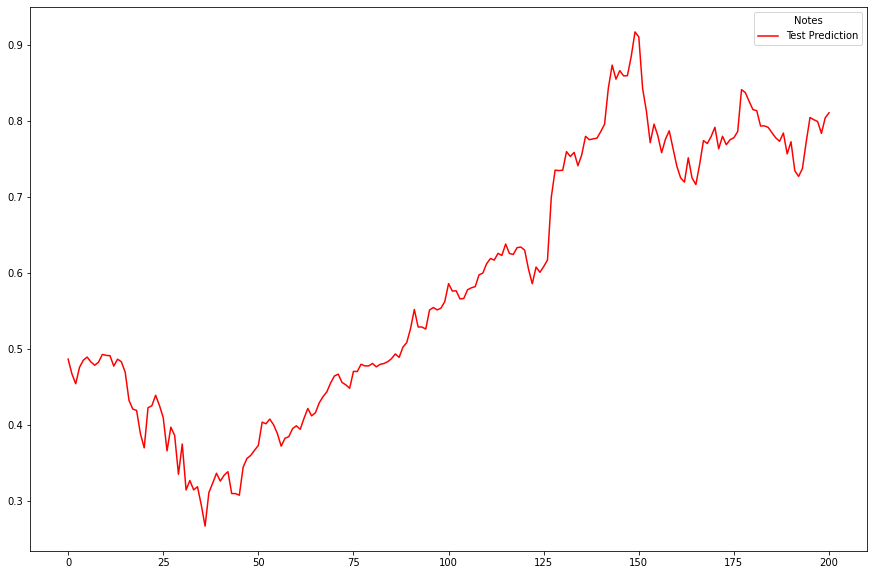

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(15,10))
plt.plot(yhat, label='Test Prediction', color='red')
plt.legend(title="Notes")
plt.show()

In [ ]:
print('Val_loss train')
model.evaluate(train_X, train_y)

Val_loss train
26/26 [==============================] - 0s 2ms/step - loss: 0.0029


0.002905266359448433

In [ ]:
print('Val_loss test')
model.evaluate(test_X, test_y)

Val_loss test
7/7 [==============================] - 1s 2ms/step - loss: 0.0172


0.017205391079187393